## Time Series Analysis
#### Problem Statement: 
Forecast Truck sales price based on the given time series datata

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [331]:
data = pd.read_csv("Truck_sales.csv")

In [332]:
data.head()

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month-Year          144 non-null    object
 1   Number_Trucks_Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [334]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_Trucks_Sold,144.0,428.729167,188.633037,152.0,273.5,406.0,560.25,958.0


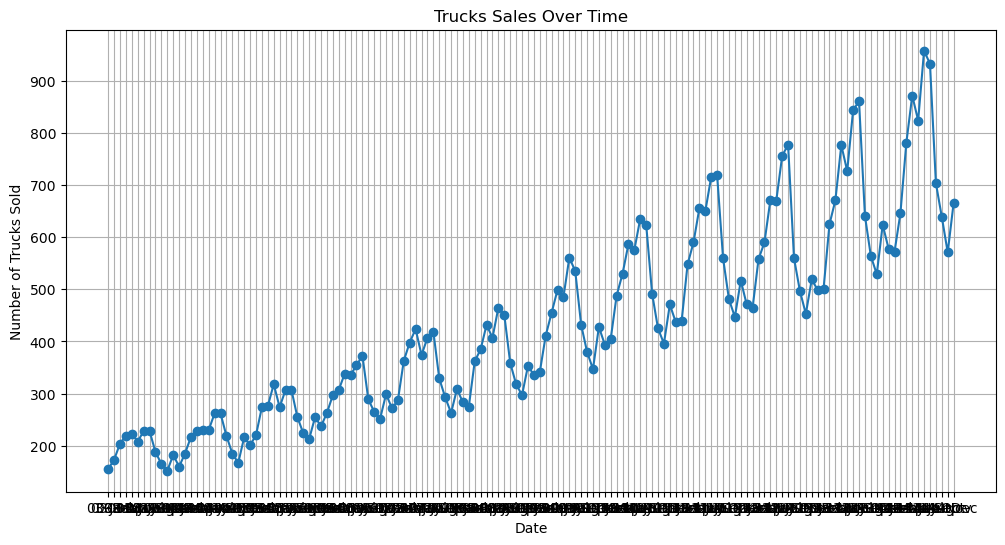

In [335]:
plt.figure(figsize=(12, 6))
plt.plot(data['Month-Year'], data['Number_Trucks_Sold'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Trucks Sold')
plt.title('Trucks Sales Over Time')
plt.grid(True)
plt.show()

## Preprocessing Data

In [336]:
data["date"]=pd.to_datetime(data["Month-Year"], format="%y-%b")
data.head()

,Month-Year,Number_Trucks_Sold,date
0,03-Jan,155,2003-01-01
1,03-Feb,173,2003-02-01
2,03-Mar,204,2003-03-01
3,03-Apr,219,2003-04-01
4,03-May,223,2003-05-01


In [337]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month_name()
data.head()

,Month-Year,Number_Trucks_Sold,date,year,month
0,03-Jan,155,2003-01-01,2003,January
1,03-Feb,173,2003-02-01,2003,February
2,03-Mar,204,2003-03-01,2003,March
3,03-Apr,219,2003-04-01,2003,April
4,03-May,223,2003-05-01,2003,May


In [338]:
data.drop(columns = ['Month-Year'], inplace = True)

In [339]:
grp = data.groupby('date')['Number_Trucks_Sold'].sum()
grp.head()

date
2003-01-01    155
2003-02-01    173
2003-03-01    204
2003-04-01    219
2003-05-01    223
Name: Number_Trucks_Sold, dtype: int64

In [340]:
data.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [341]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']

In [345]:
pv_t = pd.pivot_table(data=data, index = 'year', columns = 'month', values='Number_Trucks_Sold')
pv_t = pv_t[months]
pv_t

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2003,155.0,173.0,204.0,219.0,223.0,208.0,228.0,228.0,188.0,165.0,152.0,182.0
2004,160.0,185.0,217.0,229.0,231.0,230.0,262.0,262.0,219.0,185.0,167.0,216.0
2005,201.0,220.0,274.0,276.0,318.0,274.0,307.0,307.0,255.0,224.0,213.0,255.0
2006,237.0,263.0,297.0,307.0,338.0,336.0,354.0,373.0,289.0,265.0,252.0,299.0
2007,272.0,287.0,363.0,398.0,424.0,374.0,407.0,419.0,329.0,293.0,263.0,309.0
2008,283.0,275.0,362.0,385.0,432.0,407.0,465.0,451.0,359.0,318.0,297.0,353.0
2009,336.0,341.0,411.0,455.0,499.0,485.0,561.0,535.0,432.0,380.0,347.0,428.0
2010,394.0,405.0,488.0,530.0,587.0,576.0,636.0,624.0,492.0,425.0,396.0,471.0
2011,437.0,440.0,548.0,590.0,656.0,650.0,716.0,719.0,560.0,481.0,447.0,517.0


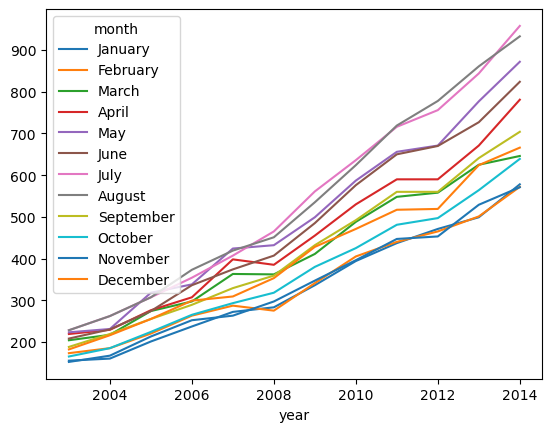

In [346]:
pv_t.plot(kind='line')
plt.show()

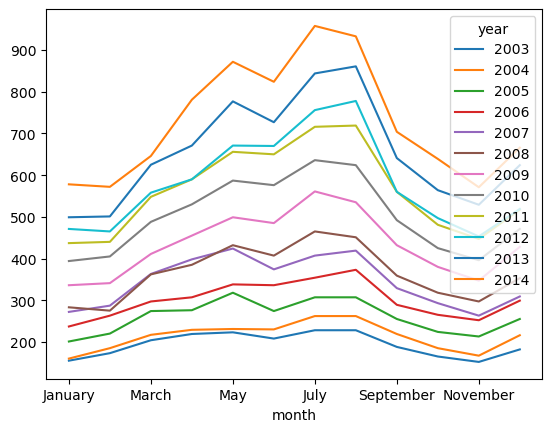

In [347]:
pv_tt = pv_t.T
pv_tt.plot(kind='line')
plt.show()

In [375]:
#indexing date
tt = data.set_index('date')
trend_data = tt['Number_Trucks_Sold']
trend_data.head()

date
2003-01-01    155
2003-02-01    173
2003-03-01    204
2003-04-01    219
2003-05-01    223
Name: Number_Trucks_Sold, dtype: int64

In [376]:
tt.head()

,Number_Trucks_Sold,year,month
date,,,
2003-01-01,155,2003,January
2003-02-01,173,2003,February
2003-03-01,204,2003,March
2003-04-01,219,2003,April
2003-05-01,223,2003,May


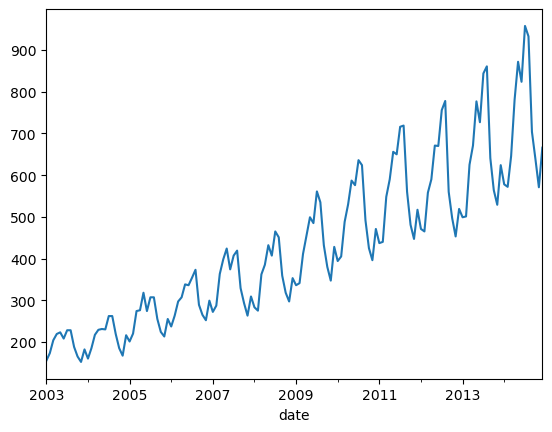

In [377]:
trend_data.plot(kind='line')
plt.show()

In [378]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [379]:
decomp_add = seasonal_decompose(trend_data, model='add', extrapolate_trend=4)

In [380]:
model = pd.DataFrame([decomp_add.trend, decomp_add.seasonal, decomp_add.resid, decomp_add.observed]).T

In [381]:
model

,trend,seasonal,resid,Number_Trucks_Sold
date,,,,
2003-01-01,188.550000,-71.994589,38.444589,155.0
2003-02-01,189.441667,-68.384867,51.943200,173.0
2003-03-01,190.333333,-0.532089,14.198756,204.0
2003-04-01,191.225000,32.456105,-4.681105,219.0
2003-05-01,192.116667,79.031105,-48.147772,223.0
...,...,...,...,...
2014-08-01,741.954167,107.148814,83.897020,933.0
2014-09-01,747.891667,-18.099450,-25.792216,704.0
2014-10-01,753.829167,-71.413686,-43.415480,639.0


In [382]:
188.550000*0.822787*0.999120

154.999968739812

In [383]:
decomp_add.trend

date
2003-01-01    188.550000
2003-02-01    189.441667
2003-03-01    190.333333
2003-04-01    191.225000
2003-05-01    192.116667
                 ...    
2014-08-01    741.954167
2014-09-01    747.891667
2014-10-01    753.829167
2014-11-01    759.766667
2014-12-01    765.704167
Name: trend, Length: 144, dtype: float64

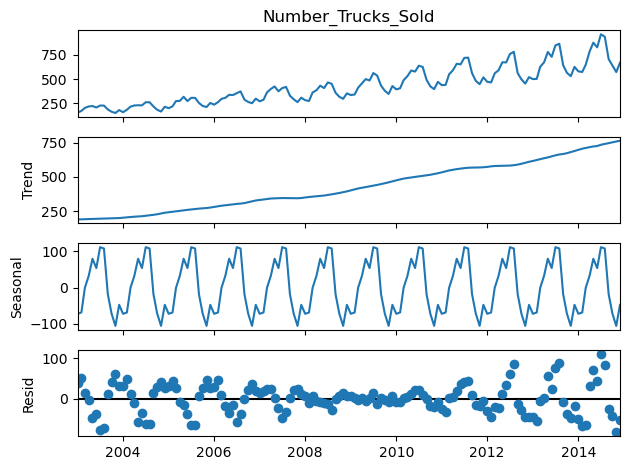

In [384]:
decomp_add.plot()
plt.show()

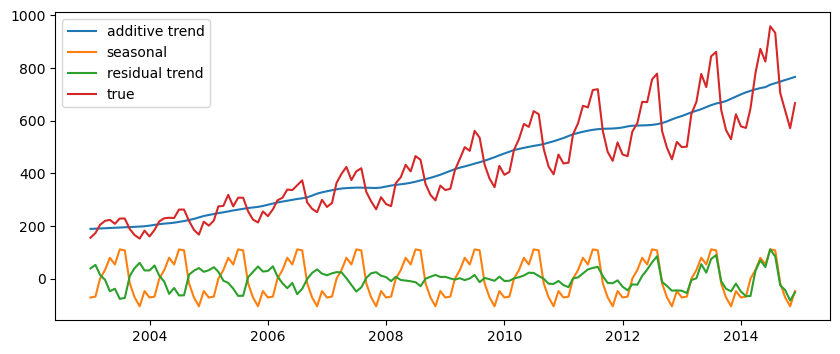

In [385]:
plt.figure(figsize=(10,4))
plt.plot(decomp_add.trend, label='additive trend')
plt.plot(decomp_add.seasonal, label='seasonal')
plt.plot(decomp_add.resid, label='residual trend')
plt.plot(decomp_add.observed, label="true")
plt.legend()
plt.show()

In [386]:
add_result = pd.DataFrame([decomp_add.seasonal, decomp_add.trend, decomp_add.resid, decomp_add.observed])
add_result.head().T

,seasonal,trend,resid,Number_Trucks_Sold
date,,,,
2003-01-01,-71.994589,188.550000,38.444589,155.0
2003-02-01,-68.384867,189.441667,51.943200,173.0
2003-03-01,-0.532089,190.333333,14.198756,204.0
2003-04-01,32.456105,191.225000,-4.681105,219.0
2003-05-01,79.031105,192.116667,-48.147772,223.0
...,...,...,...,...
2014-08-01,107.148814,741.954167,83.897020,933.0
2014-09-01,-18.099450,747.891667,-25.792216,704.0
2014-10-01,-71.413686,753.829167,-43.415480,639.0


## Building another model to make sure we have better result with less error 

### Exponential Smoothing

In [387]:
trend_data.tail()

date
2014-08-01    933
2014-09-01    704
2014-10-01    639
2014-11-01    571
2014-12-01    666
Name: Number_Trucks_Sold, dtype: int64

In [389]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Re-init data

In [408]:
# re-init data
data = pd.read_csv("Truck_sales.csv")
data['Month-Year'] = pd.to_datetime(data['Month-Year'], format='%y-%b')

# Set 'Month-Year' as the index
data.set_index('Month-Year', inplace=True)

# Sort the index (in case it's not sorted)
data.sort_index(inplace=True)

# Display the first few rows
print(data.head())

            Number_Trucks_Sold
Month-Year                    
2003-01-01                 155
2003-02-01                 173
2003-03-01                 204
2003-04-01                 219
2003-05-01                 223


In [409]:
#spliting data
y_train = data[:int(0.8*(len(data)))]
Ytest = data[int(0.8*(len(data))):]

In [410]:
#building model
exp_model = ExponentialSmoothing(y_train['Number_Trucks_Sold'], seasonal ="mul", trend = "mul", seasonal_periods = 12, freq="MS")

In [448]:
#fitting model
alpha = 0.7
beta = 0.1
gamma = 0.05
trained = exp_model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

C:\Users\Admin\Documents\time_series_analysis\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


## Prediction for next 5 Year

In [449]:
forcst = trained.forecast(60)
forcst

2012-08-01     741.357186
2012-09-01     587.539997
2012-10-01     513.512907
2012-11-01     474.822191
2012-12-01     565.028405
2013-01-01     518.202764
2013-02-01     531.961649
2013-03-01     650.746867
2013-04-01     698.732959
2013-05-01     773.581016
2013-06-01     746.631689
2013-07-01     828.841249
2013-08-01     820.241453
2013-09-01     650.057314
2013-10-01     568.153355
2013-11-01     525.345746
2013-12-01     625.150371
2014-01-01     573.342238
2014-02-01     588.565140
2014-03-01     719.989724
2014-04-01     773.081786
2014-05-01     855.894067
2014-06-01     826.077191
2014-07-01     917.034276
2014-08-01     907.519417
2014-09-01     719.226799
2014-10-01     628.607832
2014-11-01     581.245270
2014-12-01     691.669627
2015-01-01     634.348839
2015-02-01     651.191537
2015-03-01     796.600381
2015-04-01     855.341716
2015-05-01     946.965654
2015-06-01     913.976108
2015-07-01    1014.611501
2015-08-01    1004.084211
2015-09-01     795.756277
2015-10-01  

In [450]:
print('MSE:', np.mean(np.square(forcst-y_test)))

MSE: 677.8732900775441


## Model seems to be performing prety good

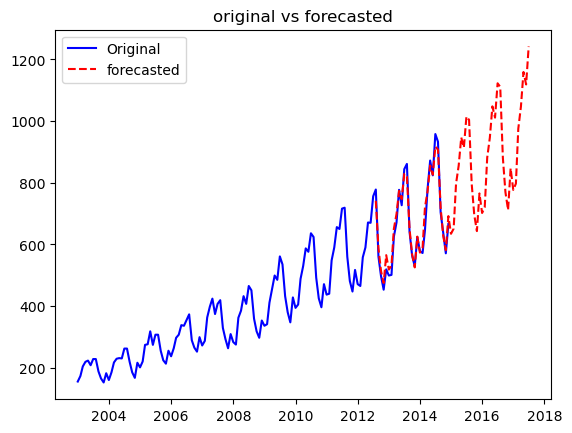

In [453]:
plt.plot(trend_data, label='Original', color='blue')
plt.plot(forcst, label='forecasted', color='red', linestyle='--')
plt.legend()
plt.title('original vs forecasted')
plt.show()

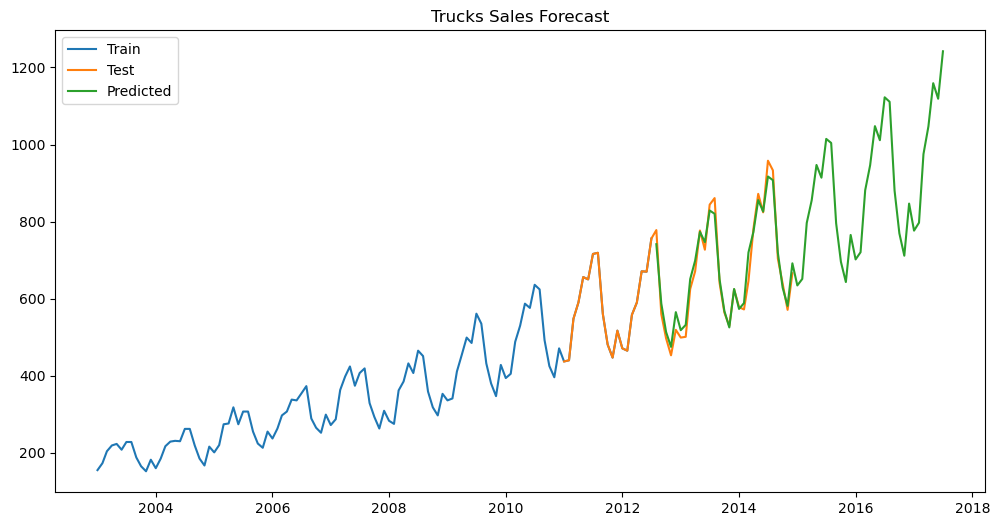

In [454]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_train['Number_Trucks_Sold'], label='Train')
plt.plot(y_test, label='Test')
plt.plot(forcst, label='Predicted')
plt.legend(loc='best')
plt.title('Trucks Sales Forecast')
plt.show()

## Exponential Smoothing model was pretty good. Let's go for another model

# SARIMAX

#### stationary test

In [456]:
from statsmodels.tsa.stattools import adfuller

In [457]:
adfuller(trend_data) # the second value is p-value and if it is > alpha(0.05) than the data is not stationary, in our case it's not stattionary

(1.1158932574252705,
 0.9953500083802602,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1107.5217075915425)

In [458]:
#transforming
yt_log = np.log(trend_data)
trans = yt_log.diff(2).dropna()
trans

date
2003-03-01    0.274695
2003-04-01    0.235780
2003-05-01    0.089052
2003-06-01   -0.051534
2003-07-01    0.022174
                ...   
2014-08-01    0.124235
2014-09-01   -0.308069
2014-10-01   -0.378501
2014-11-01   -0.209389
2014-12-01    0.041385
Name: Number_Trucks_Sold, Length: 142, dtype: float64

# We have 2 depth diff, so our (i) d == 2

In [403]:
adfuller(trans) # now our data is stationary, as our p-value is less than 0.05(alpha)

(-3.2107118233693823,
 0.01937294947942123,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -434.5515923678149)

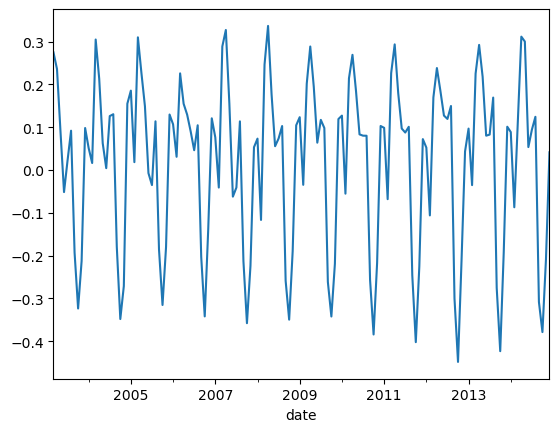

In [404]:
trans.plot()
plt.show()

<Axes: xlabel='date'>

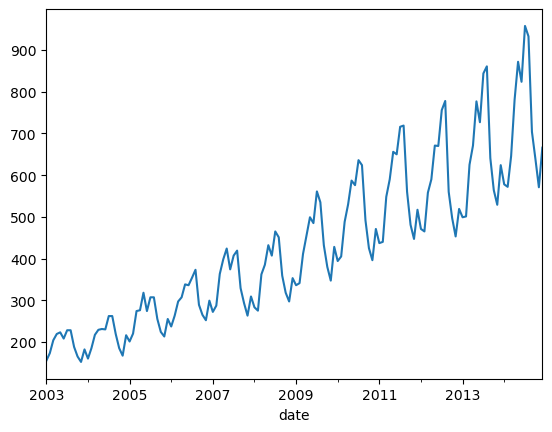

In [405]:
trend_data.plot()

## Finding p and q using ACF & PACF

In [406]:
import statsmodels.tsa.api as sm

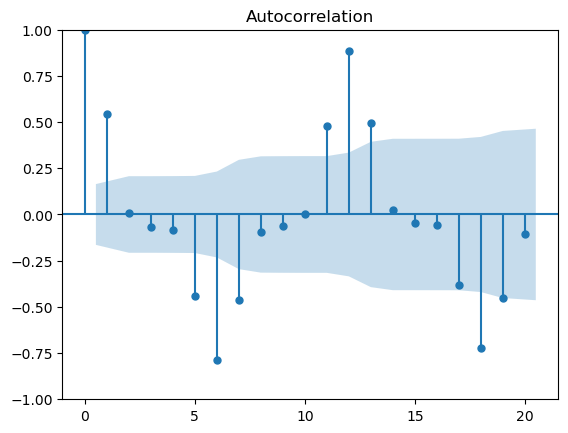

In [407]:
sm.graphics.plot_acf(trans, lags = 20)
plt.show()

### in the above plot, find the first 0 or negative data point index, and do (index - 1), in our case 2 - 1 = 1, so, q=1

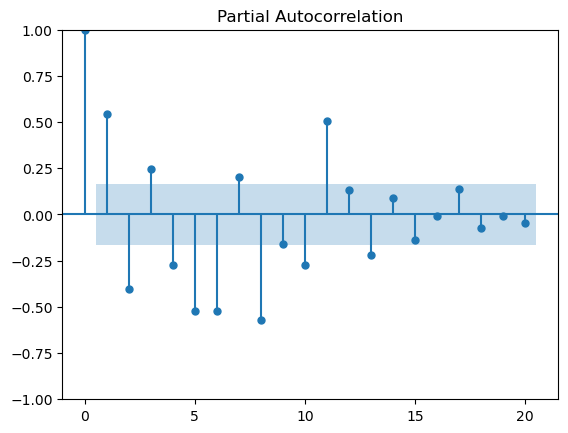

In [285]:
sm.graphics.plot_pacf(trans, lags=20)
plt.show()

## p = 2-1 = 1

In [286]:
train = yt_log[:'2014-06-01']
test = yt_log['2014-07-01':]
test

date
2014-07-01    6.864848
2014-08-01    6.838405
2014-09-01    6.556778
2014-10-01    6.459904
2014-11-01    6.347389
2014-12-01    6.501290
Name: Number_Trucks_Sold, dtype: float64

In [287]:
train

date
2003-01-01    5.043425
2003-02-01    5.153292
2003-03-01    5.318120
2003-04-01    5.389072
2003-05-01    5.407172
                ...   
2014-02-01    6.349139
2014-03-01    6.470800
2014-04-01    6.660575
2014-05-01    6.770789
2014-06-01    6.714171
Name: Number_Trucks_Sold, Length: 138, dtype: float64

## We have seasonality included thats why we will use SARIMAX

In [288]:
import statsmodels.api as smt

In [289]:
smax = smt.tsa.statespace.SARIMAX(train, order=(1,2,1), 
                                  seasonal_order=(1,0,1,12), 
                                  enforce_invertability=False, 
                                  enforce_stationarity=True, 
                                  freq='MS').fit()

C:\Users\Admin\Documents\time_series_analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\Documents\time_series_analysis\venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_invertability']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [290]:
fcast = np.exp(smax.forecast(20))
fcast

2014-07-01     940.602191
2014-08-01     950.375705
2014-09-01     718.099543
2014-10-01     631.350132
2014-11-01     586.337908
2014-12-01     685.630955
2015-01-01     640.020179
2015-02-01     638.835908
2015-03-01     756.099985
2015-04-01     851.704654
2015-05-01     958.604810
2015-06-01     916.334765
2015-07-01    1041.552145
2015-08-01    1053.412534
2015-09-01     796.887698
2015-10-01     701.164005
2015-11-01     651.393153
2015-12-01     761.020881
2016-01-01     710.634210
2016-02-01     709.298334
Freq: MS, Name: predicted_mean, dtype: float64

In [291]:
np.exp(test)

date
2014-07-01    958.0
2014-08-01    933.0
2014-09-01    704.0
2014-10-01    639.0
2014-11-01    571.0
2014-12-01    666.0
Name: Number_Trucks_Sold, dtype: float64

In [292]:
print("MSE:", np.mean(np.square(fcast-np.exp(test))))

MSE: 247.09037854247774


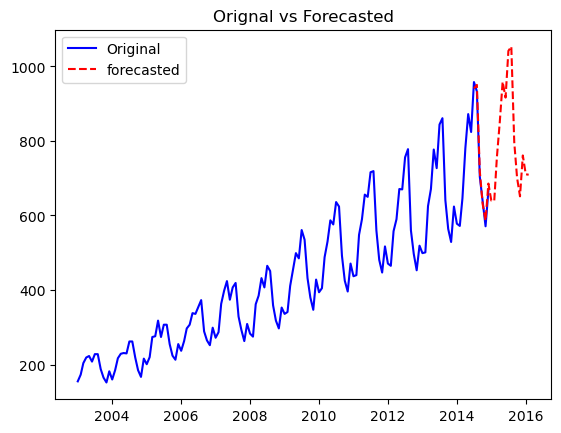

In [293]:
plt.plot(trend_data, label='Original', color='blue')
plt.plot(fcast, label='forecasted', color='red', linestyle='--')
plt.legend()
plt.title('Orignal vs Forecasted')
plt.show()

## We have pmdarima, which is considered the best algorithm for time series forecasting, it essentially gives us the best parameter with best model

In [294]:
from pmdarima import auto_arima

In [295]:
mdel = auto_arima(train, start_p = 0, max_p = 5, 
                  start_q = 0, max_q = 4, 
                  d=1, max_d = 5, 
                  start_P = 0, max_P=3, 
                  start_Q=0, max_Q=3, 
                  D=0, max_D=2, 
                  seasonal=True,
                 m=12, 
                 random_state=42)

In [296]:
print(mdel.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  138
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 238.309
Date:                            Sun, 16 Jun 2024   AIC                           -468.618
Time:                                    08:32:21   BIC                           -456.938
Sample:                                01-01-2003   HQIC                          -463.872
                                     - 06-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3527      0.071     -4.988      0.000      -0.491      -0.214
ar.S.L12       0.9930      0.006   

In [460]:
pred = np.exp(mdel.predict(n_periods=20))

In [461]:
pred

2014-07-01     940.147639
2014-08-01     952.539334
2014-09-01     718.621762
2014-10-01     632.289498
2014-11-01     587.508744
2014-12-01     686.497667
2015-01-01     641.131124
2015-02-01     639.509860
2015-03-01     755.243352
2015-04-01     852.877638
2015-05-01     960.026748
2015-06-01     917.265780
2015-07-01    1042.781786
2015-08-01    1056.428767
2015-09-01     798.583119
2015-10-01     703.278671
2015-11-01     653.808604
2015-12-01     763.130469
2016-01-01     713.043192
2016-02-01     711.252771
Freq: MS, dtype: float64

In [462]:
np.exp(test)

date
2014-07-01    958.0
2014-08-01    933.0
2014-09-01    704.0
2014-10-01    639.0
2014-11-01    571.0
2014-12-01    666.0
Name: Number_Trucks_Sold, dtype: float64

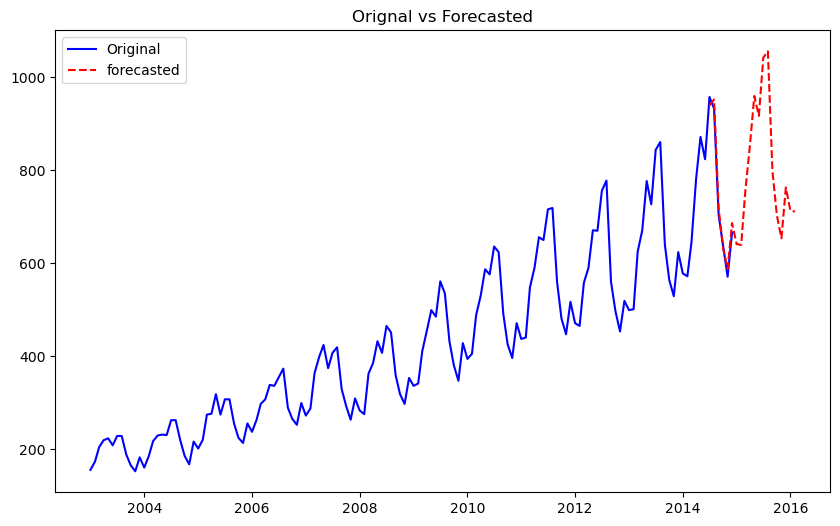

In [463]:
plt.figure(figsize=(10,6))
plt.plot(trend_data, label='Original', color='blue')
plt.plot(pred, label='forecasted', color='red', linestyle='--')
plt.legend()
plt.title('Orignal vs Forecasted')
plt.show()

### Overall all the models performed well, their predictions LGTM.